In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydelfi.score as score

%matplotlib inline

In [137]:
# we define a few hyper parameters here
np.random.seed(13)
n = 1000 # total number of data points for NF
n_sims = 10000  # total number of points for drawing
n_class = 1 # number of different cosmologies for the training
q_prior = np.linspace(2.5, 3.0, n_sims) #np.random.uniform(0, 1, n)
q_fid = np.asarray([2.75]) #np.random.uniform(0, 1, 1)

In [138]:
q_fid

array([2.75])

In [139]:
# in order to perform the compressions, we need a few things
n_vec = 50
mu = np.arange(1, n_vec+1)/(q_fid * n_vec)
Cinv = n_vec**2*np.eye(n_vec)/ np.arange(1, n_vec+1)
dmudt = -np.arange(1, n_vec+1)/(q_fid**2 * n_vec)
dmudt = np.reshape(dmudt, [1, -1])

# now we define the score compression
Compressor = score.Gaussian(n_vec, q_fid, mu = mu, Cinv = Cinv, dmudt = dmudt)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args=None):
    return Compressor.scoreMLE(d)
compressor_args=None

In [140]:
n_vec = 50
d_vec = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec[i, j-1] = np.random.gamma(j / q_fid**2, q_fid / n_vec)

mu_ = np.mean(d_vec, axis=0)
cov_ = np.cov(d_vec, rowvar=False)
Cinv_ = np.linalg.inv(cov_)


step = 0.1
h = +step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_p_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)

h = -step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_m_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)        
dmudt_ = (mu_p_ - mu_m_)/(2*step)
dmudt_ = np.reshape(dmudt_, [1, -1])

# now we define the score compression
Compressor = score.Gaussian(n_vec, q_fid, mu = mu_, Cinv = Cinv_, dmudt = dmudt_)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args=None):
    return Compressor.scoreMLE(d)
compressor_args=None

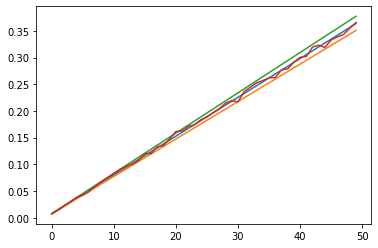

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.arange(n_vec), mu)
ax.plot(np.arange(n_vec), mu_p_)
ax.plot(np.arange(n_vec), mu_m_)
ax.plot(np.arange(n_vec), mu_)

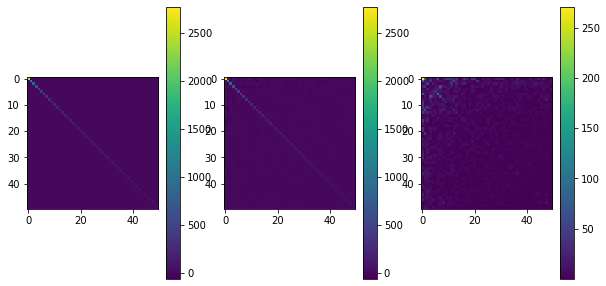

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
M = np.maximum(Cinv.max(), Cinv_.max())
m = np.minimum(Cinv.min(), Cinv_.min())
im = ax[0].imshow(Cinv, vmin=m, vmax=M)
fig.colorbar(im, ax=ax[0])
im = ax[1].imshow(Cinv_, vmin=m, vmax=M)
fig.colorbar(im, ax=ax[1])
im = ax[2].imshow(np.abs(Cinv - Cinv_))
fig.colorbar(im, ax=ax[2])

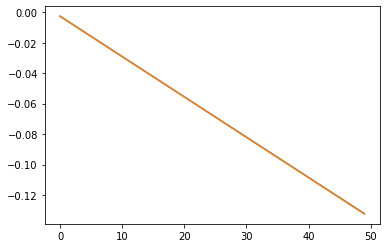

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.arange(n_vec), dmudt[0])
ax.plot(np.arange(n_vec), dmudt_[0])

In [144]:
n_vec = 50
d_vec = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec[i, j-1] = np.random.gamma(j / q_fid**2, q_fid / n_vec)

mu_ = np.mean(d_vec, axis=0)
cov_ = np.cov(d_vec, rowvar=False)
Cinv_ = np.linalg.inv(cov_)


step = 0.1
h = +2*step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_2p_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)

h = +step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_p_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)

h = -step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_m_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)        

h = -2*step
q_fid_p = q_fid + h
d_vec_p = np.zeros((n, n_vec))
for i in range(n):
    for j in range(1, n_vec+1):
        d_vec_p[i, j-1] = np.random.gamma(j / q_fid_p**2, q_fid_p / n_vec)

mu_2m_ = np.arange(1, n_vec+1)/(q_fid_p * n_vec) #np.mean(d_vec_p, axis=0)        

dmudt_ = (-mu_2p_ + 8*mu_p_ - 8*mu_m_ + mu_2m_)/(12*step)
dmudt_ = np.reshape(dmudt_, [1, -1])

# now we define the score compression
Compressor = score.Gaussian(n_vec, q_fid, mu = mu_, Cinv = Cinv_, dmudt = dmudt_)
Compressor.compute_fisher()
Finv = Compressor.Finv

def compressor(d, compressor_args=None):
    return Compressor.scoreMLE(d)
compressor_args=None

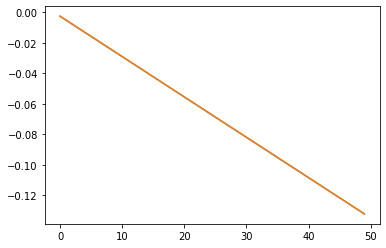

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.arange(n_vec), dmudt[0])
ax.plot(np.arange(n_vec), dmudt_[0])

# Conclusion

In the end, it is not about the method used to estimate the derivative, but rather the way we estimate the mean (and the covariance). In the 2D cosmological case, the mean and the covariance should be easy to estimate (as we are sampling from a Gamma distribution as well), and the mean can even be compared to what CLASS or CAMB says about it. So, you shall care only about those 2, or model them somehow.